In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func_value(a, x):
    res = np.round(a * x * (1 - x), 8)
    return np.nan_to_num(res) if np.isinf(res) else res


def generate_func_values(a, initial_value, range_number):
    x = [func_value(a, initial_value)]
    for i in range(1, range_number):
        x.append(func_value(a, x[i - 1]))
    return x

In [3]:
def generate_sequence(time_series, dimension, delay):
    seq = np.array([time_series[0 : len(time_series) - delay * dimension]])
    if delay * dimension > len(time_series):
        return []
    for i in range(1, dimension):
        seq = np.append(
            seq,
            [time_series[i * delay : len(time_series) - delay * (dimension - i)]],
            axis=0,
        )
    return seq.T.reshape(len(time_series)-dimension, dimension, 1)

In [4]:
def compute_eig(sequences):
    eig = np.array([])
    matrix = np.multiply(sequences, sequences.T)
    for m in matrix:
        cov_mat = np.cov(m)
        eigv, eigh = np.linalg.eig(cov_mat)
        eig = np.append(eig, np.array(eigv).flatten())
        eig = np.append(eig, np.array(eigh).flatten())
    eig = np.array([eigv, eigv]).flatten()
    return np.round(np.sort(eig, kind="mergesort")[::-1], 8)

In [5]:
def generate_error(eig, dimension):
    return [np.round(np.sqrt(eig[i + 1]), 8) for i in range(dimension)]

In [6]:
def get_stable_value_index(err):
    val = [err[0]]
    idx = [1]
    for i in range(1, len(err)):
        if err[i - 1] != err[i]:
            val.append(err[i])
            idx.append(i + 1)
    return (val, idx)

In [7]:
def takens(time_series, dimension, delay):
    sequences = generate_sequence(
        time_series=time_series, dimension=dimension, delay=delay
    )
    eig = compute_eig(sequences=sequences)
    err = generate_error(eig=eig, dimension=dimension)
    val, idx = get_stable_value_index(err=err)
    return (val, idx, err)

In [8]:
def plot(val, idx, err, length):
    fig, ax = plt.subplots()
    ax.set_xlabel("Correspondance")
    ax.set_ylabel("Erreur")
    plt.title(f"Nombre d'unité d'entrée (A = 2)")
    ax.plot(np.array(range(1, length + 1)), err, "o")
    ax.stem(idx[1::], val[1::])
    ax.set_xlim(left=0)
    ax.set_xticks(idx[1::], labels=idx[1::])
    plt.show()

In [9]:
a = 2
initial_value = 0.1
range_number = 500
dimension = 100
delay = 1
time_series = generate_func_values(
    a=a, initial_value=initial_value, range_number=range_number
)

In [10]:
val, idx, err = takens(delay=delay, dimension=dimension, time_series=time_series)

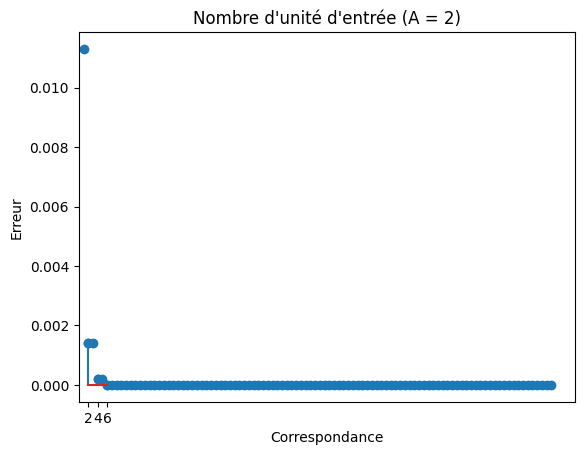

In [11]:
plot(val=val, length=dimension, err=err, idx=idx)